In [13]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

!pip install graphviz

In [14]:
path = "./churn2.csv"
df = pd.read_csv(path)[["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE",
                        "OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION",
                        "REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"]].dropna()

In [15]:
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)

In [16]:
df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('str')
df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('str')
df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('str')

In [17]:
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)

In [18]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
COLLEGE2                        int32
LEAVE2                          int32
dtype: object

In [19]:
predictor_cols = ["INCOME", "OVERAGE","LEFTOVER","HOUSE","OVER_15MINS_CALLS_PER_MONTH",
                  "AVERAGE_CALL_DURATION","COLLEGE2"]
target_col = "LEAVE2"

In [20]:
predictor_cols = ["INCOME", "OVERAGE","LEFTOVER","HOUSE","OVER_15MINS_CALLS_PER_MONTH",
                  "AVERAGE_CALL_DURATION","COLLEGE2"]
target_col = "LEAVE2"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols],df[target_col],test_size = 0.25,random_state = 0)

In [21]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 7)
X_test shape: (5000, 7)
y_train shape: (15000,)
y_test shape: (5000,)


In [22]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=12)

In [23]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=0)

dt_accuracy_train = cross_val_score(decision_tree, X_train_scaled, y_train, cv = kfold, scoring = 'accuracy')

accuracy = np.mean(dt_accuracy_train)
std = np.std(dt_accuracy_train)

dt_error = (1 - dt_accuracy_train)

dt_mean_error = np.mean(dt_error)
dt_std_error = np.std(dt_error)

print("10-Fold Accuracy:", dt_accuracy_train)
print("Mean Accuracy:", accuracy)
print("Standard Deviation:", std)

print("Average Error:", dt_mean_error)
print("Average Std. Dev. Error:", dt_std_error)

10-Fold Accuracy: [0.69733333 0.71666667 0.702      0.69066667 0.70933333 0.686
 0.692      0.712      0.702      0.70933333]
Mean Accuracy: 0.7017333333333333
Standard Deviation: 0.009634198346400067
Average Error: 0.2982666666666667
Average Std. Dev. Error: 0.009634198346400067


./images/tree.dot
./images/tree.png


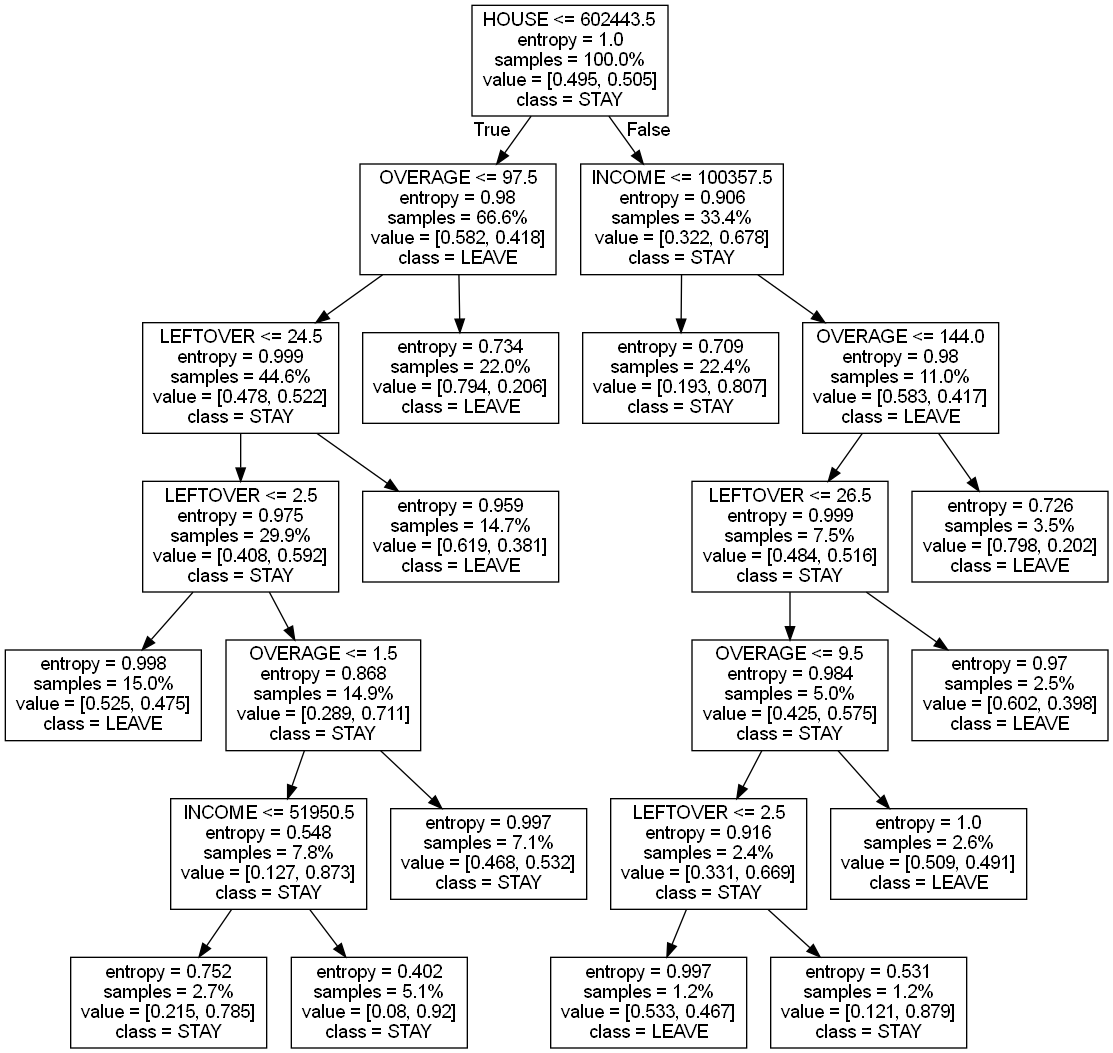

In [24]:
from IPython.display import Image
from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    
    directory1 = directory[2:]
    os.system("mkdir %s" %(directory1))
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,feature_names=feature_names,class_names=class_names,
                               proportion=proportion)
    
    image_name = "%s/%s.png" % (directory, name)
    print(dot_name)
    print(image_name)
    os.system("dot -Tpng %s  -o %s" % (dot_name, image_name))
    
    return Image(filename=image_name)

visualize_tree(decision_tree, predictor_cols, ["LEAVE", "STAY"])